In [8]:
import pandas as pd

df=pd.read_csv("titanic-passengers (1).csv",encoding="iso-8859-1",sep=";")
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Embarked'].fillna("s",inplace=True)
df.drop(columns=["Cabin"],inplace=True)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

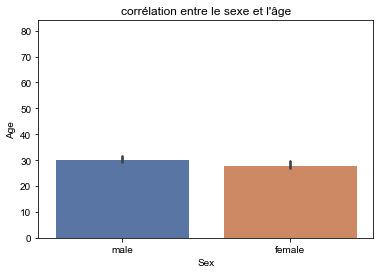

In [2]:
# correlation between Sex and age
import matplotlib.pyplot as plt

plt.xlabel("Sex")
plt.ylabel("Age")
plt.title("corrélation entre le sexe et l'âge")
vc=df["Age"]
vc.plot.bar(rot=0)

import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Sex", y="Age", data=df)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

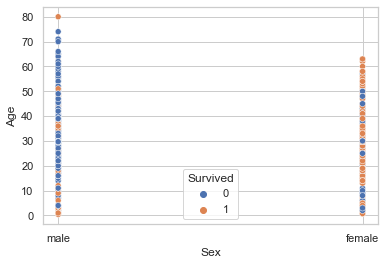

In [7]:
# correlation between Sex and age of Survived
sns.scatterplot(data=df, x="Sex", y="Age", hue="Survived")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

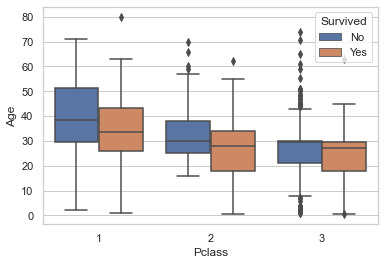

In [3]:
# correlation between Pclass and age of Survived
sns.boxplot(data=df, x="", y="Age", hue="Survived")

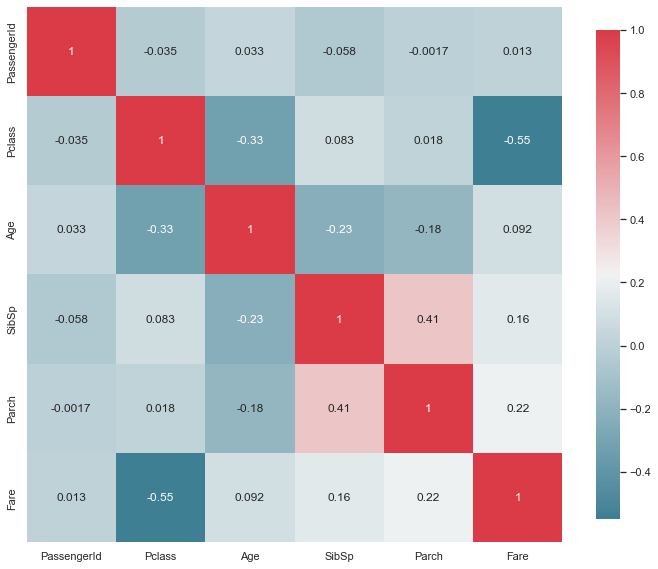

In [4]:
# execution of the function
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap( corr, 
                    cmap = cmap,
                    square=True, 
                    cbar_kws={ 'shrink' : .9 }, 
                    ax=ax, 
                    annot = True, 
                    annot_kws = { 'fontsize' : 12 } 
    )
plot_correlation_map(df)    

In [5]:
# analyse
# the function calculates the partial correlation of each characteristics
# each characteristic is equal to 1 parrapot to their own characteristics, but differs for other characteristics

# the groupby function combined with the mean
cleanup={"Survived":{"Yes":1, "No": 0}}  # at first, let's convert Promoted to numerical format
df.replace(cleanup, inplace=True)
df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [6]:
# drop the useless columns
df.drop(columns=["Name","SibSp","Parch"],inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked
0,343,0,2,male,28.0,248740,13.0000,S
1,76,0,3,male,25.0,348123,7.6500,S
2,641,0,3,male,20.0,350050,7.8542,S
3,568,0,3,female,29.0,349909,21.0750,S
4,672,0,1,male,31.0,F.C. 12750,52.0000,S


# 